# 03 - Entrenamiento_Evaluación
Este notebook realiza el entrenamiento y evaluación.

In [11]:

# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos desde la carpeta data/raw
data_path = '../data/raw/Housing.csv'
housing_df = pd.read_csv(data_path)

# Feature Engeneering para el modelo final


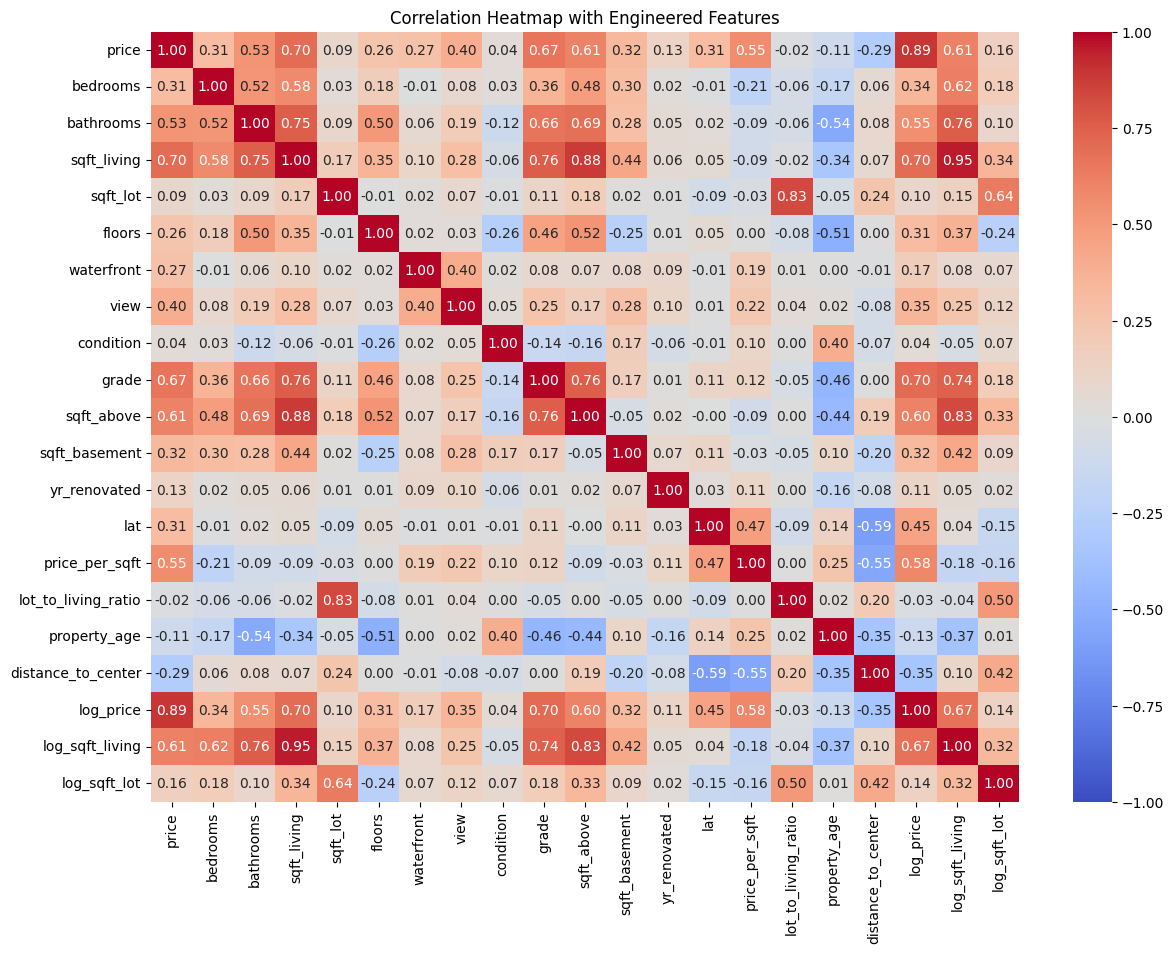

In [12]:
import numpy as np
from geopy.distance import geodesic
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data_path = '../data/raw/Housing.csv'
housing_df = pd.read_csv(data_path)
from sklearn.ensemble import IsolationForest
# 1. Crear las nuevas variables propuestas en Feature Engineering

# Precio por pie cuadrado
housing_df['price_per_sqft'] = housing_df['price'] / housing_df['sqft_living']

# Relación lote/habitable
housing_df['lot_to_living_ratio'] = housing_df['sqft_lot'] / housing_df['sqft_living']

# Edad de la propiedad
housing_df['property_age'] = 2015 - housing_df[['yr_built', 'yr_renovated']].max(axis=1)

# Distancia al centro de Seattle
city_center = (47.6062, -122.3321)
housing_df['distance_to_center'] = housing_df.apply(
    lambda row: geodesic((row['lat'], row['long']), city_center).miles, axis=1
)

# Transformaciones logarítmicas
housing_df['log_price'] = np.log1p(housing_df['price'])
housing_df['log_sqft_living'] = np.log1p(housing_df['sqft_living'])
housing_df['log_sqft_lot'] = np.log1p(housing_df['sqft_lot'])

# 2. Generar la matriz de correlación con las nuevas variables
columns_to_exclude = [
    'id', 'date', 'zipcode','long', 
    'yr_built', 'sqft_living15', 'sqft_lot15'
]
correlation_matrix2 = housing_df.drop(columns=columns_to_exclude).corr(numeric_only=True)
# 3. Visualizar la matriz de correlación con un heatmap

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix2, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap with Engineered Features")
plt.show()


### Ver modelos con con las variables seleccionadas para predicir

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Variables independientes iniciales (todas menos las irrelevantes)
selected_features = ['sqft_living', 'grade', 'bathrooms', 'distance_to_center', 'property_age', 'bedrooms','view','lat','floors','waterfront']

X_initial = housing_df[selected_features]
y_initial = housing_df['price']

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_initial, y_initial, test_size=0.2, random_state=42)


In [14]:
# Guardar los conjuntos de entrenamiento
X_train.to_csv('../data/train/X_train.csv', index=False)
y_train.to_csv('../data/train/y_train.csv', index=False)

# Guardar los conjuntos de prueba
X_test.to_csv('../data/test/X_test.csv', index=False)
y_test.to_csv('../data/test/y_test.csv', index=False)

In [15]:
# Modelo de regresión lineal
model_initial = LinearRegression()
model_initial.fit(X_train, y_train)

# Predicciones
y_pred_initial = model_initial.predict(X_test)

# Evaluación del modelo inicial
rmse_initial = np.sqrt(mean_squared_error(y_test, y_pred_initial))
r2_initial = r2_score(y_test, y_pred_initial)
mae_initial = mean_absolute_error(y_test,y_pred_initial)
# Resultados iniciales
results_initial = {
    "RMSE": rmse_initial,
    "R2": r2_initial,
    "MAE": mae_initial}
results_initial



{'RMSE': np.float64(210800.17436069547),
 'R2': 0.706061119817188,
 'MAE': np.float64(127617.50510207743)}

In [16]:
from sklearn.preprocessing import StandardScaler
# Seleccionar las variables más correlacionadas para el segundo modelo
selected_features = ['sqft_living', 'grade', 'bathrooms', 'distance_to_center', 'property_age', 'bedrooms','view','lat','floors','waterfront']

X_selected = housing_df[selected_features]
scaler = StandardScaler()
X_selected = scaler.fit_transform(X_selected)

# Dividir el dataset con las variables seleccionadas
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y_initial, test_size=0.2, random_state=42)

In [17]:
# Modelo de regresión lineal con variables seleccionadas
model_selected = LinearRegression()
model_selected.fit(X_train_sel, y_train_sel)

# Predicciones con variables seleccionadas
y_pred_selected = model_selected.predict(X_test_sel)

# Evaluación del modelo con variables seleccionadas
rmse_selected = np.sqrt(mean_squared_error(y_test_sel, y_pred_selected))
r2_selected = r2_score(y_test_sel, y_pred_selected)
mae_selected = mean_absolute_error(y_test_sel,y_pred_selected)
# Resultados con variables seleccionadas
results_selected = {
    "RMSE": rmse_selected,
    "R2": r2_selected,
    "MAE": mae_selected
}

# Mostrar ambos resultados
results_selected

{'RMSE': np.float64(210800.17436069532),
 'R2': 0.7060611198171884,
 'MAE': np.float64(127617.50510207967)}

In [18]:
import joblib
joblib.dump(model_selected, 'LinearRegression_model.pkl')

['LinearRegression_model.pkl']

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Modelo Random Forest con todas las variables seleccionadas 
rf_model_initial = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model_initial.fit(X_train, y_train)
y_pred_rf_initial = rf_model_initial.predict(X_test)

# Evaluación Random Forest con todas las variables seleccionadas
rmse_rf_initial = np.sqrt(mean_squared_error(y_test, y_pred_rf_initial))
r2_rf_initial = r2_score(y_test, y_pred_rf_initial)
mae_rf_initial = mean_absolute_error(y_test,y_pred_rf_initial)
# Modelo Gradient Boosting con todas las variables seleccionadas
gb_model_initial = GradientBoostingRegressor(random_state=42, n_estimators=100)
gb_model_initial.fit(X_train, y_train)
y_pred_gb_initial = gb_model_initial.predict(X_test)

# Evaluación Gradient Boosting con todas las variables seleccionadas
rmse_gb_initial = np.sqrt(mean_squared_error(y_test, y_pred_gb_initial))
r2_gb_initial = r2_score(y_test, y_pred_gb_initial)
mae_gb_initial = mean_absolute_error(y_test,y_pred_gb_initial)



In [20]:
# Modelo Random Forest con variables escaladas
rf_model_selected = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model_selected.fit(X_train_sel, y_train_sel)
y_pred_rf_selected = rf_model_selected.predict(X_test_sel)

# Evaluación Random Forest con variables escaladas
rmse_rf_selected = np.sqrt(mean_squared_error(y_test_sel, y_pred_rf_selected))
r2_rf_selected = r2_score(y_test_sel, y_pred_rf_selected)
mae_rf_selected = mean_absolute_error(y_test_sel,y_pred_rf_selected)
# Modelo Gradient Boosting con variables escaladas
gb_model_selected = GradientBoostingRegressor(random_state=42, n_estimators=100)
gb_model_selected.fit(X_train_sel, y_train_sel)
y_pred_gb_selected = gb_model_selected.predict(X_test_sel)

# Evaluación Gradient Boosting con variables escaladas
rmse_gb_selected = np.sqrt(mean_squared_error(y_test_sel, y_pred_gb_selected))
r2_gb_selected = r2_score(y_test_sel, y_pred_gb_selected)
mae_gb_selected = mean_absolute_error(y_test_sel,y_pred_gb_selected)


In [21]:
# Resultados finales
results = {
    "Linear Regression ": {"RMSE": rmse_initial, "R2": r2_initial, "MAE": mae_initial},
    "Linear Regression escaladas": {"RMSE": rmse_selected, "R2": r2_selected, "MAE": mae_selected},
    "Random Forest ": {"RMSE": rmse_rf_initial, "R2": r2_rf_initial, "MAE": mae_rf_initial},
    "Random Forest escaladas": {"RMSE": rmse_rf_selected, "R2": r2_rf_selected, "MAE": mae_rf_selected},
    "Gradient Boosting ": {"RMSE": rmse_gb_initial, "R2": r2_gb_initial, "MAE": mae_gb_initial},
    "Gradient Boosting escaladas": {"RMSE": rmse_gb_selected, "R2": r2_gb_selected, "MAE": mae_gb_selected},
}

# Convertir resultados a un DataFrame
results_df = pd.DataFrame(results).T

# Mostrar el DataFrame
print(results_df)

                                      RMSE        R2            MAE
Linear Regression            210800.174361  0.706061  127617.505102
Linear Regression escaladas  210800.174361  0.706061  127617.505102
Random Forest                134946.457584  0.879541   75844.291099
Random Forest escaladas      134830.039145  0.879749   75793.127229
Gradient Boosting            143310.702115  0.864146   84672.712661
Gradient Boosting escaladas  143310.702115  0.864146   84672.712661


In [22]:
import joblib
joblib.dump(rf_model_initial, 'rf_model.pkl')
joblib.dump(gb_model_initial, 'gb_model.pkl')

['gb_model.pkl']

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.2, 0.3],
}

# Configure GridSearchCV with Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_sel, y_train_sel)

# Retrieve best parameters and the associated RMSE
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_rmse = np.sqrt(-grid_search.best_score_)

best_params, best_rmse

Fitting 5 folds for each of 27 candidates, totalling 135 fits


({'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150},
 np.float64(127052.06567012379))

In [24]:
# Train the final Gradient Boosting model with optimal parameters
final_model = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=150,
    random_state=42
)

# Fit the model on the training data
final_model.fit(X_train, y_train)

# Predict on the test set
y_pred_final = final_model.predict(X_test)

# Evaluate the final model
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
final_r2 = r2_score(y_test, y_pred_final)
final_mae = mean_absolute_error(y_test, y_pred_final)
final_results = {
    "Final RMSE": final_rmse,
    "Final R²": final_r2,
    "Final MAE": final_mae
}

final_results


{'Final RMSE': np.float64(130506.17374717387),
 'Final R²': 0.8873380619814673,
 'Final MAE': np.float64(76115.03138696155)}

In [25]:
import joblib
joblib.dump(final_model, 'final_model.pkl')

['final_model.pkl']

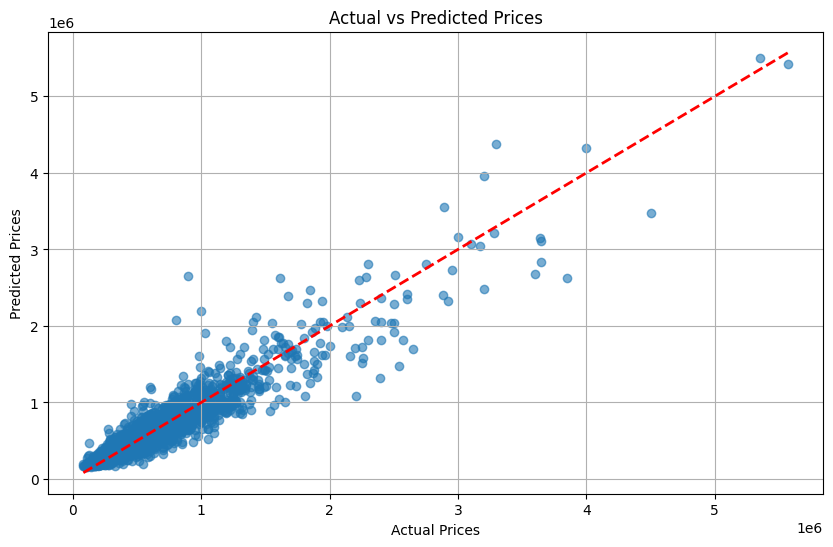

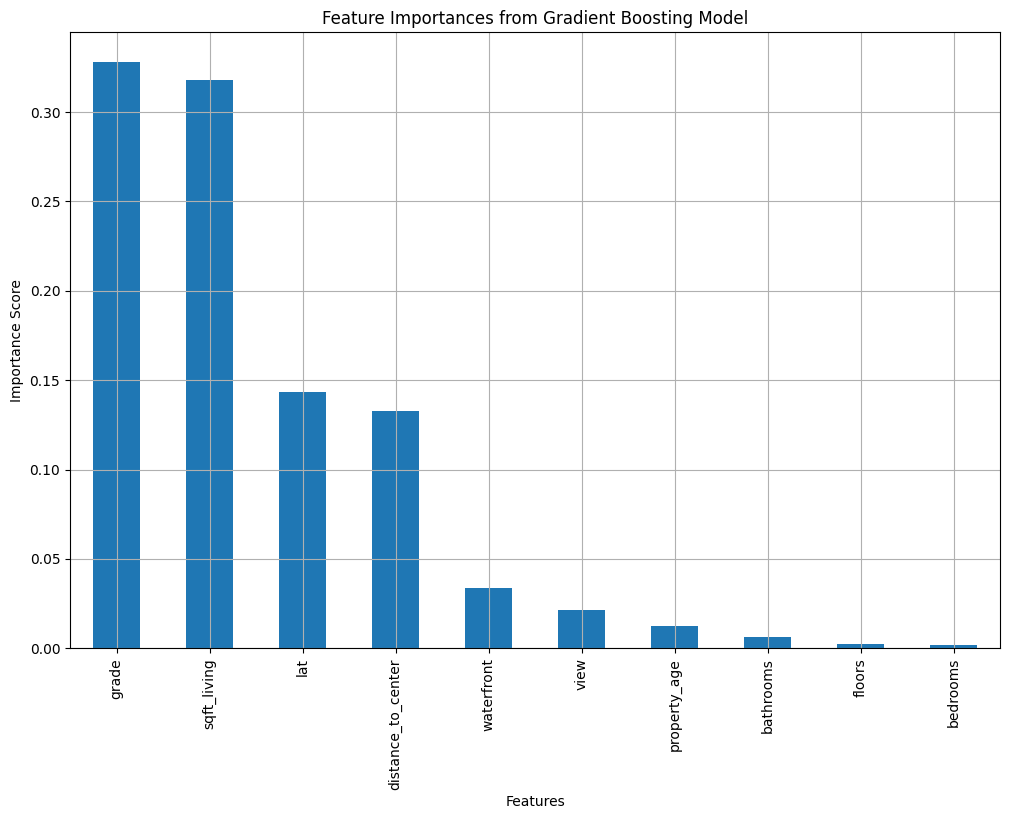

In [26]:
import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_final, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid()
plt.show()

# Feature importance visualization
feature_importances = pd.Series(final_model.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sorted_importances.plot(kind='bar')
plt.title('Feature Importances from Gradient Boosting Model')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.grid()
plt.show()


In [27]:
sorted_importances

grade                 0.328279
sqft_living           0.317928
lat                   0.143273
distance_to_center    0.132771
waterfront            0.033546
view                  0.021294
property_age          0.012549
bathrooms             0.006029
floors                0.002376
bedrooms              0.001955
dtype: float64

- Análisis:

Buen ajuste general: La mayoría de los puntos están cercanos a la línea roja, indicando que el modelo predice razonablemente bien los precios.
Errores en precios altos: Hay dispersión en las predicciones de propiedades con precios altos (> 3M), lo cual podría deberse a la alta variabilidad en estos casos.
- Conclusión:

El modelo supervisado tiene un desempeño sólido en la mayoría de los rangos de precios, pero podría beneficiarse de un ajuste adicional en el rango superior.

# Modelos No Supervisados

Feature Engineering:

Se calculan nuevas características como la edad de la propiedad (property_age) y la distancia al centro de Seattle (distance_to_center).

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from geopy.distance import geodesic

# Cargar el dataset
housing_df = pd.read_csv('../data/raw/Housing.csv')

# Feature Engeneering final:

# Edad de la propiedad
housing_df['property_age'] = 2015 - housing_df[['yr_built', 'yr_renovated']].max(axis=1)

# Distancia al centro de Seattle
city_center = (47.6062, -122.3321)
housing_df['distance_to_center'] = housing_df.apply(
    lambda row: geodesic((row['lat'], row['long']), city_center).miles, axis=1
)
# Selección de columnas relevantes para el clustering
features = housing_df[['sqft_living', 'grade', 'bathrooms', 'distance_to_center', 'property_age', 'bedrooms','view','lat','floors','waterfront']]  # Ajusta según tu dataset

# Escalar las características para K-Means
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


Se usa K-Means para agrupar las viviendas en clusters basados en características relevantes. Se aplica el método del codo para determinar el número óptimo de clusters.

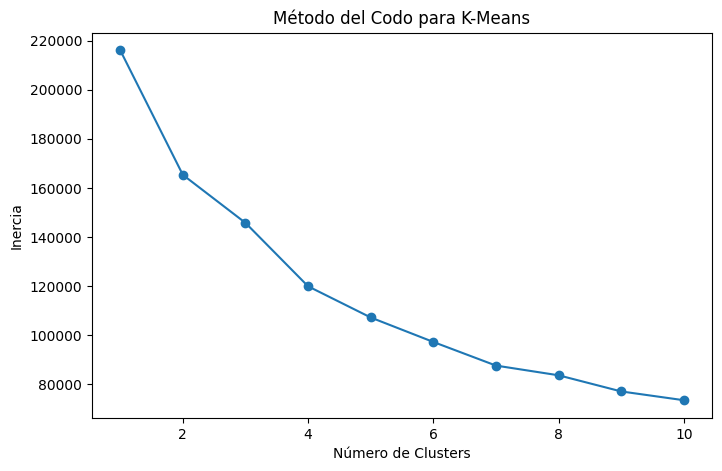

In [13]:
# Método del codo
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Visualizar el codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-Means')
plt.show()


Elbow Point (Punto del Codo):

Según el gráfico, parece que el punto donde la curva comienza a aplanarse es alrededor de 3 o 4 clusters.
Este es un buen indicativo del número óptimo de clusters, ya que después de este punto, añadir más clusters no reduce significativamente la inercia.
Recomendación:

Puedes proceder con 3 o 4 clusters para segmentar las viviendas

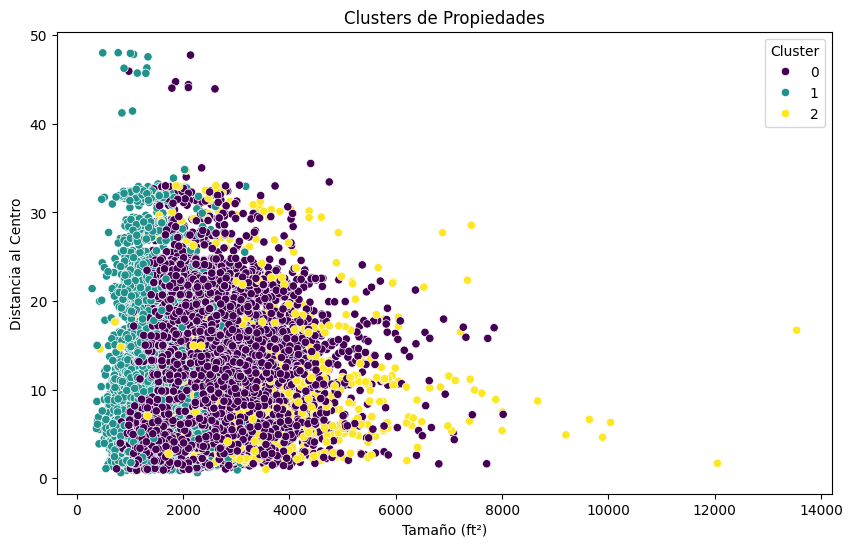

In [14]:
# Aplicar K-Means con 3 clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
housing_df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualización de clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features["sqft_living"], y=features["distance_to_center"], hue=housing_df['Cluster'], palette='viridis')
plt.xlabel('Tamaño (ft²)')
plt.ylabel('Distancia al Centro')
plt.title('Clusters de Propiedades')
plt.show()



- Clusters:

- Cluster 0 (puntos morados):
Representa propiedades más pequeñas en términos de tamaño (sqft_living) y distribuidas a varias distancias del centro.
- Cluster 1 (puntos turquesas):
Agrupa propiedades de tamaño pequeño o mediano, generalmente más cercanas al centro.
- Cluster 2 (puntos amarillos):
Propiedades más grandes (alto sqft_living) y ubicadas a diversas distancias, pero probablemente representan un segmento exclusivo o de alta gama.
- Distribución:
El gráfico muestra cómo el tamaño y la distancia influyen en la segmentación. Parece que el tamaño tiene una mayor influencia para diferenciar los clusters.


In [15]:
# Resumen estadístico por cluster
cluster_summary = housing_df.groupby('Cluster')[['sqft_living', 'grade', 'bathrooms', 'distance_to_center', 'property_age', 'bedrooms','view','lat','floors','waterfront','price']].mean()
print(cluster_summary)


         sqft_living     grade  bathrooms  distance_to_center  property_age  \
Cluster                                                                       
0        2531.839340  8.308619   2.642369           12.895303     20.836409   
1        1546.764663  6.933364   1.576916           10.513974     59.497751   
2        3172.355910  8.904382   2.778386            9.849689     39.329349   

         bedrooms      view        lat    floors  waterfront         price  
Cluster                                                                     
0        3.708424  0.021385  47.554453  1.912885    0.000000  6.105898e+05  
1        3.028453  0.068472  47.563991  1.124323    0.000000  4.071062e+05  
2        3.782205  2.736388  47.565815  1.610558    0.108234  1.070889e+06  


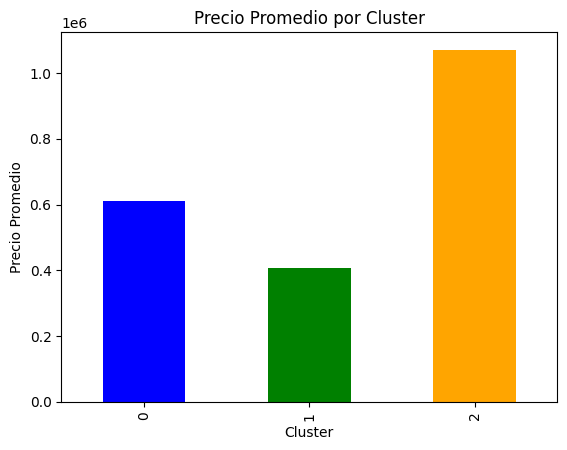

In [16]:
cluster_summary['price'].plot(kind='bar', title='Precio Promedio por Cluster', color=['blue', 'green', 'orange'])
plt.xlabel('Cluster')
plt.ylabel('Precio Promedio')
plt.show()


- Cluster 0:

Propiedades de tamaño mediano-grande (2531 ft²), con una calificación de construcción de 8.31.
Relativamente más alejadas del centro (12.9 millas) con una edad promedio de 20 años.
Precio promedio: ~$610,590.
Estas propiedades parecen representar casas modernas de mayor tamaño pero ubicadas fuera del centro.
- Cluster 1:

Propiedades de tamaño pequeño-mediano (1546 ft²), con una calificación de construcción más baja (6.93).
Más cercanas al centro (10.5 millas) con una edad promedio elevada (59 años).
Precio promedio: ~$407,106.
Estas propiedades parecen ser casas antiguas y más asequibles, probablemente en vecindarios más céntricos.
- Cluster 2:

Propiedades de tamaño grande (3172 ft²) con una calificación alta (8.90).
Más cercanas al centro (9.8 millas) y con una edad intermedia (39 años).
Mayor cantidad de vistas (2.73) y una proporción más alta frente al agua (10.8%).
Precio promedio: ~$1,070,889.
Estas son propiedades exclusivas de lujo, con ubicación y características premium.



Conclusiones
Segmentación clara:
- Cluster 1 representa propiedades más asequibles y pequeñas.
- Cluster 2 son propiedades de lujo con características exclusivas.
- Cluster 0 se encuentra en un término medio, representando casas modernas y espaciosas pero más alejadas.
- Ubicación y características clave:

El precio está fuertemente influenciado por el tamaño, las vistas y la proximidad al agua, además de la ubicación respecto al centro de Seattle.

Se utiliza Isolation Forest para identificar y visualizar los outliers

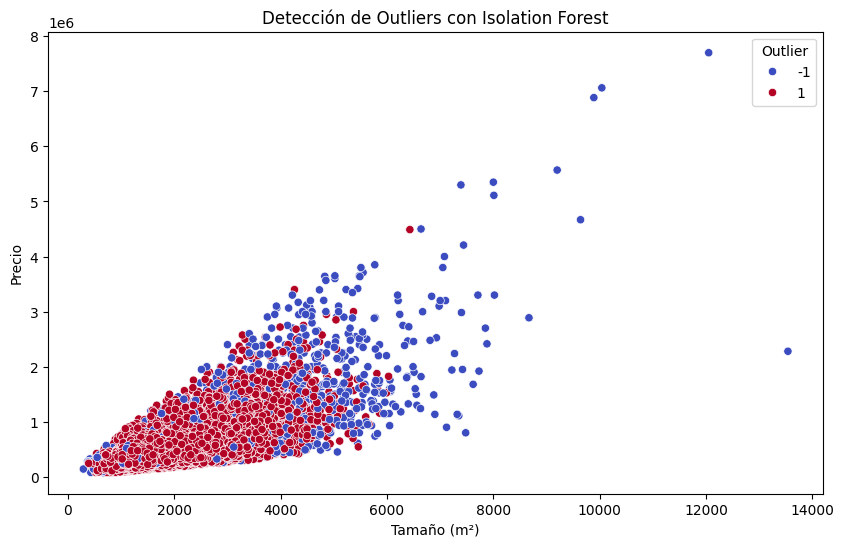

In [17]:
from sklearn.ensemble import IsolationForest

# Aplicar Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Ajusta la tasa de outliers
housing_df['Outlier'] = iso_forest.fit_predict(scaled_features)

# Visualización de outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=housing_df['sqft_living'], y=housing_df['price'], hue=housing_df['Outlier'], palette='coolwarm')
plt.xlabel('Tamaño (m²)')
plt.ylabel('Precio')
plt.title('Detección de Outliers con Isolation Forest')
plt.show()


Análisis del Gráfico
Ejes:

Eje X: Tamaño de las propiedades (sqft_living).
Eje Y: Precio de las propiedades (price).
Clasificación de outliers:

Puntos azules (Outlier = -1): Propiedades clasificadas como normales.
Puntos rojos (Outlier = 1): Propiedades clasificadas como outliers.
Distribución:

La mayoría de las propiedades siguen una relación lógica entre el tamaño y el precio.
Los outliers (puntos rojos) se concentran en precios o tamaños que se desvían significativamente de la tendencia general.
Conclusiones
Outliers identificados:

Las propiedades con tamaños muy grandes y precios altos (más de 8,000 sqft y más de $4,000,000) están marcadas como outliers.
También hay outliers en el rango bajo de precios, posiblemente errores o propiedades atípicas.
Impacto de los outliers:

Estos puntos pueden influir desproporcionadamente en los modelos predictivos si no se manejan correctamente.

Reducción de Dimensionalidad:

Se aplica PCA (Análisis de Componentes Principales) para reducir las dimensiones de las características a tres componentes principales.

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Selección de características relevantes
features = housing_df[['sqft_living', 'grade', 'bathrooms', 'distance_to_center', 'property_age', 'bedrooms','view','lat','floors','waterfront']]  # Ajusta las columnas según tu dataset

# Normalizar los datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


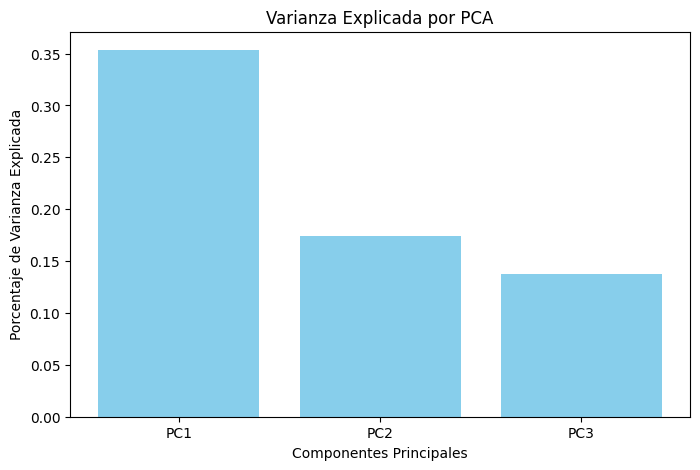

In [19]:
# Aplicar PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_features)

# Crear un DataFrame con las componentes principales
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = housing_df['Cluster']  # Asignar clusters para la visualización

# Visualizar la varianza explicada
plt.figure(figsize=(8, 5))
plt.bar(x=['PC1', 'PC2', 'PC3'], height=pca.explained_variance_ratio_, color='skyblue')
plt.xlabel('Componentes Principales')
plt.ylabel('Porcentaje de Varianza Explicada')
plt.title('Varianza Explicada por PCA')
plt.show()


Varianza Explicada:

PC1 (Componente Principal 1): Explica alrededor del 35% de la varianza total del dataset.
PC2 (Componente Principal 2): Explica alrededor del 20%.
PC3 (Componente Principal 3): Explica cerca del 15%.
Suma de la varianza explicada:

Los tres primeros componentes principales explican alrededor del 70% de la varianza total. Esto indica que el PCA ha reducido la dimensionalidad del dataset mientras conserva una gran parte de la información.
Importancia del PC1:

El PC1 tiene la mayor contribución a la varianza total, lo que sugiere que hay una característica o combinación de características que dominan el comportamiento del dataset.

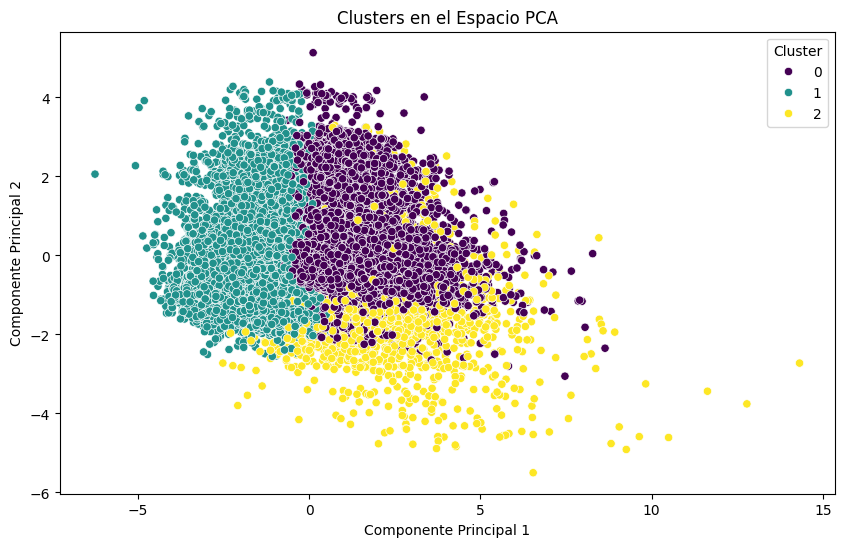

In [20]:
# Visualizar los clusters en el espacio PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('Clusters en el Espacio PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


Interpretación del Gráfico
Ejes:

Componente Principal 1 (PC1): Captura la mayor parte de la varianza en los datos.
Componente Principal 2 (PC2): Captura la segunda mayor parte de la varianza en los datos.
Clusters:

Cluster 0 (morado): Está agrupado en el centro y parece abarcar propiedades con características promedio.
Cluster 1 (turquesa): Se encuentra más disperso hacia la izquierda, lo que sugiere que podría incluir propiedades más pequeñas o con características distintivas.
Cluster 2 (amarillo): Este cluster se encuentra en la parte inferior derecha, indicando que podría agrupar propiedades de mayor tamaño o con características más exclusivas.
Separación de clusters:

Los clusters están bien separados en el espacio PCA, lo que confirma que el PCA ha ayudado a reducir la dimensionalidad mientras mantiene una clara diferenciación entre los grupos.
- Conclusiones
Clusters bien definidos:

La separación indica que las características originales del dataset están adecuadamente capturadas por las componentes principales.
Cada cluster tiene una representación clara en el espacio PCA.
Interpretación de los clusters:

Puedes relacionar los clusters con las características originales para entender mejor qué define a cada grupo.

In [21]:
# Mostrar la contribución de cada característica a las componentes principales
pca_components = pd.DataFrame(
    pca.components_,
    columns=['sqft_living', 'grade', 'bathrooms', 'distance_to_center', 'property_age', 'bedrooms','view','lat','floors','waterfront'],  # Ajusta según tus columnas
    index=["PC1", "PC2", "PC3"]
)
print(pca_components)

     sqft_living     grade  bathrooms  distance_to_center  property_age  \
PC1     0.462870  0.447925   0.473411            0.078764     -0.341205   
PC2    -0.099346 -0.114156  -0.011922            0.650207     -0.311391   
PC3     0.051325 -0.027715  -0.062858            0.193221      0.136937   

     bedrooms      view       lat    floors  waterfront  
PC1  0.316442  0.151809  0.002970  0.331798    0.071360  
PC2 -0.035170 -0.252739 -0.603511  0.025225   -0.165067  
PC3 -0.044428  0.613527 -0.304431 -0.223780    0.644527  


- Componente Principal 1 (PC1):
Características principales:
sqft_living (0.46): El tamaño de la vivienda tiene la mayor contribución positiva.
grade (0.44): La calidad de construcción también es significativa.
bathrooms (0.47): El número de baños es relevante.
floors (0.33): El número de pisos tiene una influencia moderada.
Interpretación: PC1 captura características relacionadas con el tamaño, calidad y comodidades de la vivienda.
- Componente Principal 2 (PC2):
Características principales:
lat (-0.60): La latitud tiene una contribución negativa importante.
view (-0.25): Las vistas también afectan negativamente esta componente.
sqft_living y grade tienen una contribución mucho menor.
Interpretación: PC2 parece estar relacionado con la ubicación y aspectos visuales de la vivienda.
- Componente Principal 3 (PC3):
Características principales:
view (0.61): Las vistas tienen la mayor contribución positiva.
waterfront (0.64): La proximidad al agua es clave.
grade (0.31): La calidad también contribuye moderadamente.
Interpretación: PC3 captura aspectos de lujo y características premium, como vistas y cercanía al agua.
- Conclusiones:
PC1 está influenciado por el tamaño y las comodidades.
PC2 está dominado por la ubicación geográfica.
PC3 está enfocado en características de lujo y exclusividad.


Predicción de Precios:

Se entrena un modelo Gradient Boosting Regressor usando las componentes principales como características.
Se evalúa el modelo con métricas como RMSE, R² y MAE.

In [22]:
# Reemplazar las características originales con las componentes principales
X_pca = pca_df[['PC1', 'PC2', 'PC3']]
y = housing_df['price']  # Variable objetivo

# Dividir en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [23]:
# Entrenar un modelo simple
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=150, random_state=42)
model.fit(X_train, y_train)

# Evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")
print(f"MAE: {mae:.2f}")


RMSE: 214817.56
R²: 0.69
MAE: 113394.10


In [24]:
import joblib
joblib.dump(model, 'pca_model.pkl')

['pca_model.pkl']

Análisis de Precios:

Se analiza el promedio y la desviación estándar de los precios.

In [25]:
avg_price = housing_df['price'].mean()
std_price = housing_df['price'].std()
print(f"Promedio del precio: {avg_price:.2f}")
print(f"Desviación estándar del precio: {std_price:.2f}")


Promedio del precio: 540088.58
Desviación estándar del precio: 367126.83


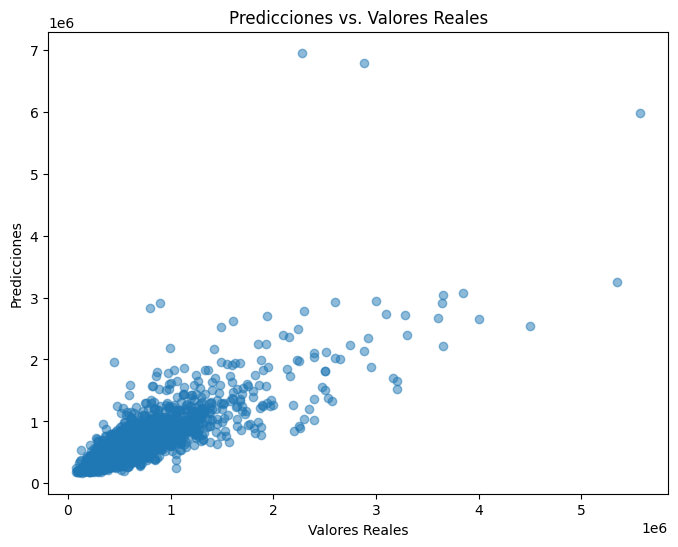

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()


- Análisis:

Mayor dispersión: En este caso, las predicciones no coinciden tan bien con los valores reales, lo que es esperado en enfoques no supervisados, ya que no están diseñados para predecir directamente valores específicos.
Este método parece más útil para segmentar propiedades o identificar patrones generales.
- Conclusión:

Aunque el enfoque no supervisado puede ser útil para tareas como la segmentación o la identificación de outliers, no es el mejor método para estimar precios exactos.